In [45]:
#-*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
male_total = data[data['Sex']=='male'].shape[0]
female_total = data[data['Sex']=='female'].shape[0]

male_survived = data[data['Survived']==1][data['Sex']=='male']
female_survived = data[data['Survived']==1][data['Sex']=='female']
male_survived_Siblings_And_Spouse = male_survived["SibSp"]
female_survived_Siblings_And_Spouse = female_survived["SibSp"]
male_Parents_And_Childrens = male_survived["Parch"]
female_Parents_And_Childrens = female_survived["Parch"]

male_unsurvived = data[data['Survived']==0][data['Sex']=='male']
female_unsurvived = data[data['Survived']==0][data['Sex']=='female']
male_unsurvived_Siblings_And_Spouse = male_unsurvived["SibSp"]
female_unsurvived_Siblings_And_Spouse = female_unsurvived["SibSp"]
male_unsurvived_Parents_And_Childrens = male_unsurvived["Parch"]
female_unsurvived_Parents_And_Childrens = female_unsurvived["Parch"]

print(data.head())


print("General Visual EDA of survival...")
print("Total Records -",data.shape[0])
print("Male -")
print("	Total -",male_total)
print("	Survived -",male_survived.shape[0],"(",male_survived.shape[0]/male_total,") -> SibSp(",male_survived_Siblings_And_Spouse.unique(),"), Parch(",male_Parents_And_Childrens.unique(),")")
print("	UnSurvived -",male_unsurvived.shape[0],"(",male_unsurvived.shape[0]/male_total,") -> SibSp(",male_unsurvived_Siblings_And_Spouse.unique(),"), Parch(",male_unsurvived_Parents_And_Childrens.unique(),")")

print("Female -")
print("	Total -",female_total)
print("	Survived -",female_survived.shape[0],"(",female_survived.shape[0]/female_total,") -> SibSp(",female_survived_Siblings_And_Spouse.unique(),"), Parch(",female_Parents_And_Childrens.unique(),")")
print("	UnSurvived -",female_unsurvived.shape[0],"(",female_unsurvived.shape[0]/male_total,") -> SibSp(",female_unsurvived_Siblings_And_Spouse.unique(),"), Parch(",male_unsurvived_Parents_And_Childrens.unique(),")")



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ge

c:\python36-32\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\python36-32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\python36-32\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\python36-32\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Age Range => 0.42 - 80.0
51 different Ages
Survived with age 0-19 = 23 ( 18.69918699186992 %)
Survived with age 20-39 = 64 ( 52.03252032520326 %)
Survived with age 40-59 = 32 ( 26.01626016260163 %)
Survived with age 60-79 = 3 ( 2.4390243902439024 %)
Survived with age 80-100 = 1 ( 0.8130081300813009 %)
29 different Ages of Male
Male Survived with age 0-19 = 8 ( 19.51219512195122 %)
Male Survived with age 20-39 = 20 ( 48.78048780487805 %)
Male Survived with age 40-59 = 11 ( 26.82926829268293 %)
Male Survived with age 60-79 = 1 ( 2.4390243902439024 %)
Male Survived with age 80-100 = 1 ( 2.4390243902439024 %)
39 different Ages of Female
Female Survived with age 0-19 = 15 ( 18.29268292682927 %)
Female Survived with age 20-39 = 44 ( 53.65853658536586 %)
Female Survived with age 40-59 = 21 ( 25.609756097560975 %)
Female Survived with age 60-79 = 2 ( 2.4390243902439024 %)
Female Survived with age 80-100 = 0 ( 0.0 %)



Class comparison
Survived 1st Class= 136
Survived 2nd Class= 87
Survived 3r

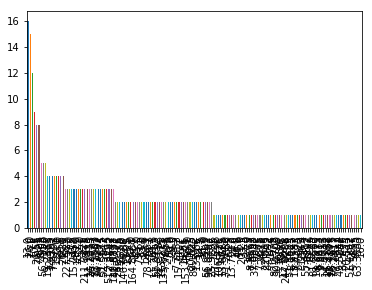

Survived with fare 0-49=> 233
Survived with fare 50-99=> 72
Survived with fare 100-149=> 19
Survived with fare 150-199=> 6
Survived with fare 200-263=> 11
Ununsurvived with fare 0-49=> 30
Ununsurvived with fare 50-99=> 19
Ununsurvived with fare 100-149=> 4
Ununsurvived with fare 150-199=> 3
Ununsurvived with fare 200-263=> 4


In [46]:
data2 = data.copy()
data2.dropna(inplace = True)
survived = data2[data2["Survived"]==1]
unsurvived = data2[data2["Survived"]==0]
male_survived = survived[survived["Sex"]=="male"]
female_survived = survived[survived["Sex"]=="female"]

print("Age Range =>",data["Age"].min(),"-",data["Age"].max())

print(survived["Age"].nunique(),"different Ages")
#print(survived["Age"].value_counts())

survived_less_20 = survived[survived["Age"] < 20]
survived_bet_20_n_39 = survived[ (survived["Age"] > 19) & (survived["Age"] < 40) ]
survived_bet_40_n_59 = survived[ (survived["Age"] > 39) & (survived["Age"] < 60) ]
survived_bet_60_n_79 = survived[ (survived["Age"] > 59) & (survived["Age"] < 80) ]
survived_bet_80_n_99 = survived[survived["Age"] > 79]

print("Survived with age 0-19 =",survived_less_20.shape[0],"(",survived_less_20.shape[0]/survived.shape[0]*100,"%)")

print("Survived with age 20-39 =",survived_bet_20_n_39.shape[0],"(",survived_bet_20_n_39.shape[0]/survived.shape[0]*100,"%)")

print("Survived with age 40-59 =",survived_bet_40_n_59.shape[0],"(",survived_bet_40_n_59.shape[0]/survived.shape[0]*100,"%)")

print("Survived with age 60-79 =",survived_bet_60_n_79.shape[0],"(",survived_bet_60_n_79.shape[0]/survived.shape[0]*100,"%)")

print("Survived with age 80-100 =",survived_bet_80_n_99.shape[0],"(",survived_bet_80_n_99.shape[0]/survived.shape[0]*100,"%)")

#pd.value_counts(survived['Age']).plot.bar()
#plt.show()




print(male_survived["Age"].nunique(),"different Ages of Male")
#print(male_survived["Age"].value_counts())

male_survived_less_20 = male_survived[male_survived["Age"] < 20]
male_survived_bet_20_n_39 = male_survived[ (male_survived["Age"] > 19) & (male_survived["Age"] < 40) ]
male_survived_bet_40_n_59 = male_survived[ (male_survived["Age"] > 39) & (male_survived["Age"] < 60) ]
male_survived_bet_60_n_79 = male_survived[ (male_survived["Age"] > 59) & (male_survived["Age"] < 80) ]
male_survived_bet_80_n_99 = male_survived[male_survived["Age"] > 79]

print("Male Survived with age 0-19 =",male_survived_less_20.shape[0],"(",male_survived_less_20.shape[0]/male_survived.shape[0]*100,"%)")

print("Male Survived with age 20-39 =",male_survived_bet_20_n_39.shape[0],"(",male_survived_bet_20_n_39.shape[0]/male_survived.shape[0]*100,"%)")

print("Male Survived with age 40-59 =",male_survived_bet_40_n_59.shape[0],"(",male_survived_bet_40_n_59.shape[0]/male_survived.shape[0]*100,"%)")

print("Male Survived with age 60-79 =",male_survived_bet_60_n_79.shape[0],"(",male_survived_bet_60_n_79.shape[0]/male_survived.shape[0]*100,"%)")

print("Male Survived with age 80-100 =",male_survived_bet_80_n_99.shape[0],"(",male_survived_bet_80_n_99.shape[0]/male_survived.shape[0]*100,"%)")

#pd.value_counts(male_survived['Age']).plot.bar()
#plt.show()



print(female_survived["Age"].nunique(),"different Ages of Female")
#print(female_survived["Age"].value_counts())

female_survived_less_20 = female_survived[female_survived["Age"] < 20]
female_survived_bet_20_n_39 = female_survived[ (female_survived["Age"] > 19) & (female_survived["Age"] < 40) ]
female_survived_bet_40_n_59 = female_survived[ (female_survived["Age"] > 39) & (female_survived["Age"] < 60) ]
female_survived_bet_60_n_79 = female_survived[ (female_survived["Age"] > 59) & (female_survived["Age"] < 80) ]
female_survived_bet_80_n_99 = female_survived[female_survived["Age"] > 79]

print("Female Survived with age 0-19 =",female_survived_less_20.shape[0],"(",female_survived_less_20.shape[0]/female_survived.shape[0]*100,"%)")

print("Female Survived with age 20-39 =",female_survived_bet_20_n_39.shape[0],"(",female_survived_bet_20_n_39.shape[0]/female_survived.shape[0]*100,"%)")

print("Female Survived with age 40-59 =",female_survived_bet_40_n_59.shape[0],"(",female_survived_bet_40_n_59.shape[0]/female_survived.shape[0]*100,"%)")

print("Female Survived with age 60-79 =",female_survived_bet_60_n_79.shape[0],"(",female_survived_bet_60_n_79.shape[0]/female_survived.shape[0]*100,"%)")

print("Female Survived with age 80-100 =",female_survived_bet_80_n_99.shape[0],"(",female_survived_bet_80_n_99.shape[0]/female_survived.shape[0]*100,"%)")

#pd.value_counts(female_survived['Age']).plot.bar()
#plt.show()

print("\n\n\nClass comparison")
print("Survived 1st Class=",data[(data['Survived']==1) & (data['Pclass']==1)].shape[0])
print("Survived 2nd Class=",data[(data['Survived']==1) & (data['Pclass']==2)].shape[0])
print("Survived 3rd Class=",data[(data['Survived']==1) & (data['Pclass']==3)].shape[0])

print("\nClass comparison for Male")
print("Survived 1st Class=",data[(data['Survived']==1) & (data['Sex']=='male') & (data['Pclass']==1)].shape[0])
print("Survived 2nd Class=",data[(data['Survived']==1) & (data['Sex']=='male') & (data['Pclass']==2)].shape[0])
print("Survived 3rd Class=",data[(data['Survived']==1) & (data['Sex']=='male') & (data['Pclass']==3)].shape[0])

print("\nClass comparison for Female")
print("Survived 1st Class=",data[(data['Survived']==1) & (data['Sex']=='female') & (data['Pclass']==1)].shape[0])
print("Survived 2nd Class=",data[(data['Survived']==1) & (data['Sex']=='female') & (data['Pclass']==2)].shape[0])
print("Survived 3rd Class=",data[(data['Survived']==1) & (data['Sex']=='female') & (data['Pclass']==3)].shape[0])


print("\n\n\nPort comparison---")
print("Passangers embarked from Cherbourg Port=",data[(data['Survived']==1) & (data['Embarked']=='C')].shape[0])
print("Passangers embarked from Southampton Port=",data[(data['Survived']==1) & (data['Embarked']=='S')].shape[0])
print("Passangers embarked from Queenstown Port=",data[(data['Survived']==1) & (data['Embarked']=='Q')].shape[0])



print("\n\n\nFare Comparison---")
survived = data[data["Survived"]==1]
print("Fare Range =>",data["Fare"].min(),"-",data["Fare"].max())
print("Survived Fare Range =>",survived["Fare"].min(),"-",survived["Fare"].max())
print("Unsurvived Fare Range =>",unsurvived["Fare"].min(),"-",unsurvived["Fare"].max())
print("Survived with fare < 264 =>",survived[survived["Fare"]<264].shape[0])
print("Survived with fare > 263 =>",survived[survived["Fare"]>263].shape[0])

print("Only 3 passanger has the fare of 512.3292")
pd.value_counts(survived['Fare']).plot.bar()
plt.show()


print("Survived with fare 0-49=>",survived[survived["Fare"]<50].shape[0])
print("Survived with fare 50-99=>",survived[(survived["Fare"]>49) & (survived["Fare"]<100)].shape[0])
print("Survived with fare 100-149=>",survived[(survived["Fare"]>99) & (survived["Fare"]<150)].shape[0])
print("Survived with fare 150-199=>",survived[(survived["Fare"]>149) & (survived["Fare"]<200)].shape[0])
print("Survived with fare 200-263=>",survived[(survived["Fare"]>199) & (survived["Fare"]<264)].shape[0])


print("Ununsurvived with fare 0-49=>",unsurvived[unsurvived["Fare"]<50].shape[0])
print("Ununsurvived with fare 50-99=>",unsurvived[(unsurvived["Fare"]>49) & (unsurvived["Fare"]<100)].shape[0])
print("Ununsurvived with fare 100-149=>",unsurvived[(unsurvived["Fare"]>99) & (unsurvived["Fare"]<150)].shape[0])
print("Ununsurvived with fare 150-199=>",unsurvived[(unsurvived["Fare"]>149) & (unsurvived["Fare"]<200)].shape[0])
print("Ununsurvived with fare 200-263=>",unsurvived[(unsurvived["Fare"]>199) & (unsurvived["Fare"]<264)].shape[0])

In [47]:
print("\nUnderstanding about the data...")
print("\n\n\nGender comparison---")
print("Most of the males died but most of the female Survived.")
print("\n\n\nRelatives comparison---")
print("People with fewer relatives Survived")
print("\n\n\nAge comparison---")
print("Young Adults with age range 20-39 survived the most")
print("Adults with age range 40-59 survived comparitively less")
print("Childrens and teenager with age less than 20 survived comparitively less")
print("Old age with age range 60-79 survived comparitively less")
print("Very Old age with age over 80 almost not survived")

print("\n\n\nClass comparison---")

print("1st class survived the most")
print("3rd class survived the second most")
print("2nd class survived the least, may be because of their cabin position or activity places in ship, point to be noted")

print("\nHigh class lady survied the most because their man has more power and wealth.")
print("Low class man survied the most because of their lifestyle and muscle power, they may have more stamina to swim.")

print("\nWhen the accident happened , the clock of the ship ticking at 23:40, which is nearly before the late night. So, people should be busy in recreational activities.")

print("\nIn comparison for 2nd and 3rd class cabin and activity place is considerable,\nFor ladies, 2nd and 3rd class survived nearly")
print("For men, 2nd and 3rd class survived difference is huge, because\n Depending on pasanger class, recreational and hangout activities of men change huge.")
print("And their probable places right before accident also should varry depending on class. May be for financial reason.\n With more money, they have more access to recreational activities ")

print("but for women their financial position or class does not varry their activity, may be because of women remain inside cabin or with family comparitively more, considering the socio-economic-cuturic sitution of 19th century.")
print("From this difference of 2nd and 3rd class depending on Gender, prove our hypothesis that,")
print("Cabin does not play a role for difference in survival of 2nd and 3rd classes.")
print("But the recreational & hangout places for different classes based on their economic ability right before the accident plays a role behind the survival of passangers.")



print("\n\n\nPort comparison---")

print("Passangers embarked from Southampton Port survived the most")
print("Passangers embarked from Cherbourg Port survived comperatively less")
print("Passangers embarked from Queenstown Port survived the least")


print("\n\n\nFare comparison---")
print("Only 3 passanger has the fare of 512.3292, they may be vips")
print("As the fare decreases the chance of survival and death rises")
print("Both Survived and died passangers have the same pattern.")
print("That makes no sense.")
print("May be most of the fare data is missing or relation of fare and survival is not clear yet.")


Understanding about the data...



Gender comparison---
Most of the males died but most of the female Survived.



Relatives comparison---
People with fewer relatives Survived



Age comparison---
Young Adults with age range 20-39 survived the most
Adults with age range 40-59 survived comparitively less
Childrens and teenager with age less than 20 survived comparitively less
Old age with age range 60-79 survived comparitively less
Very Old age with age over 80 almost not survived



Class comparison---
1st class survived the most
3rd class survived the second most
2nd class survived the least, may be because of their cabin position or activity places in ship, point to be noted

High class lady survied the most because their man has more power and wealth.
Low class man survied the most because of their lifestyle and muscle power, they may have more stamina to swim.

When the accident happened , the clock of the ship ticking at 23:40, which is nearly before the late night. So, people sh

In [48]:
print("Fare has some unmatchable relation, because of may be there is missing data.")

Fare has some unmatchable relation, because of may be there is missing data.


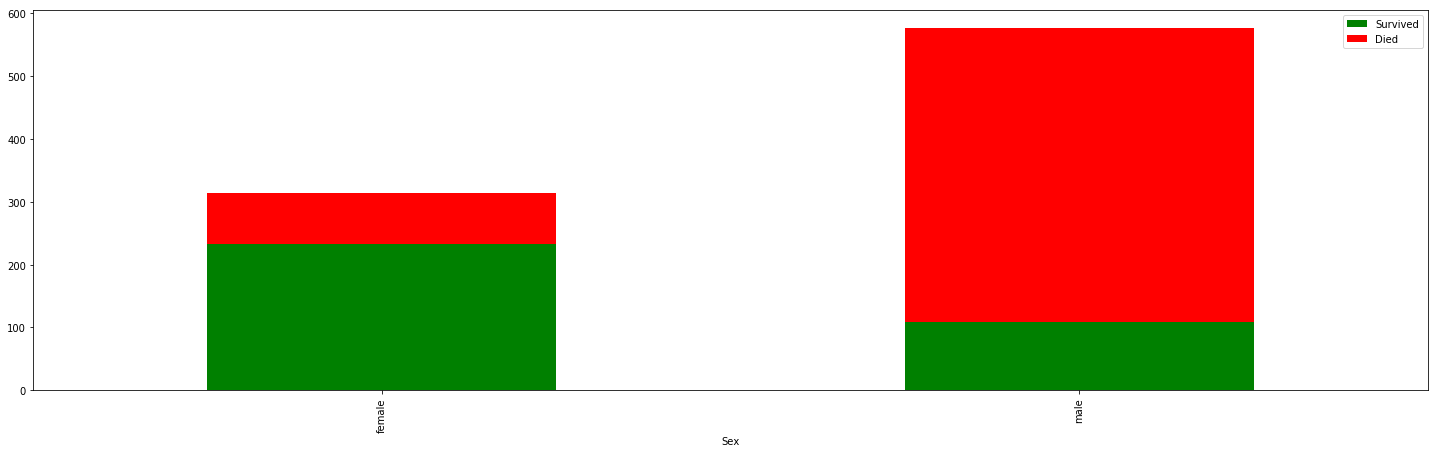

In [49]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['g', 'r']);

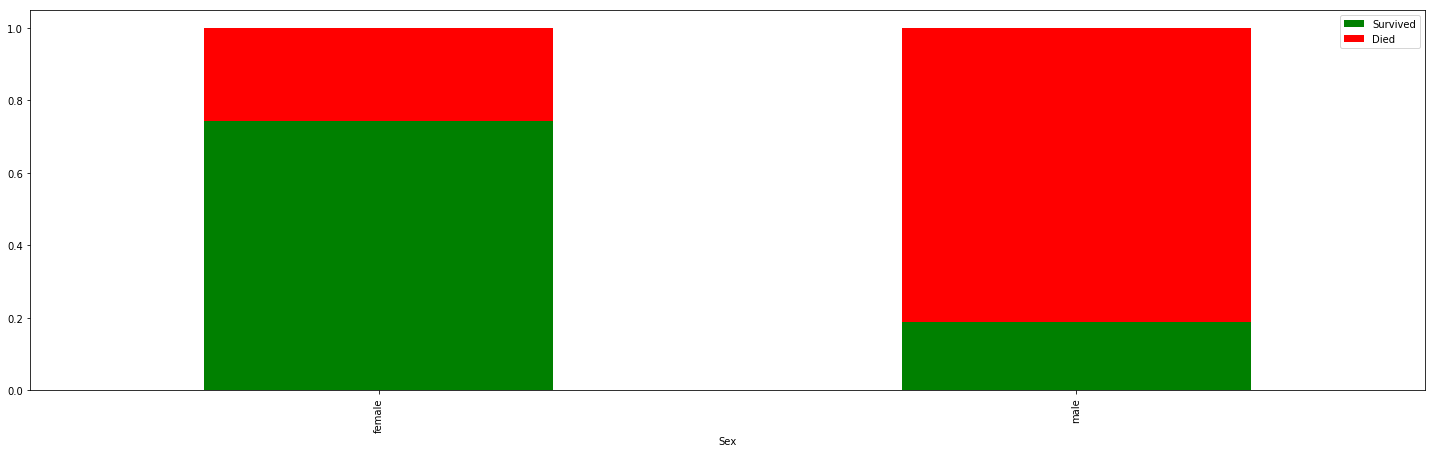

In [50]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['g', 'r']);

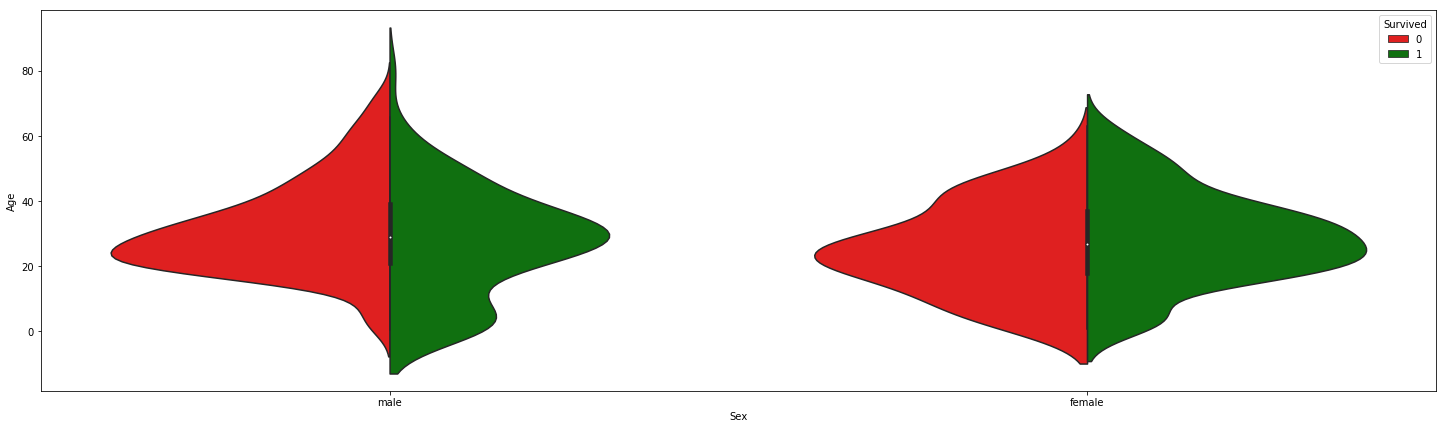

In [51]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

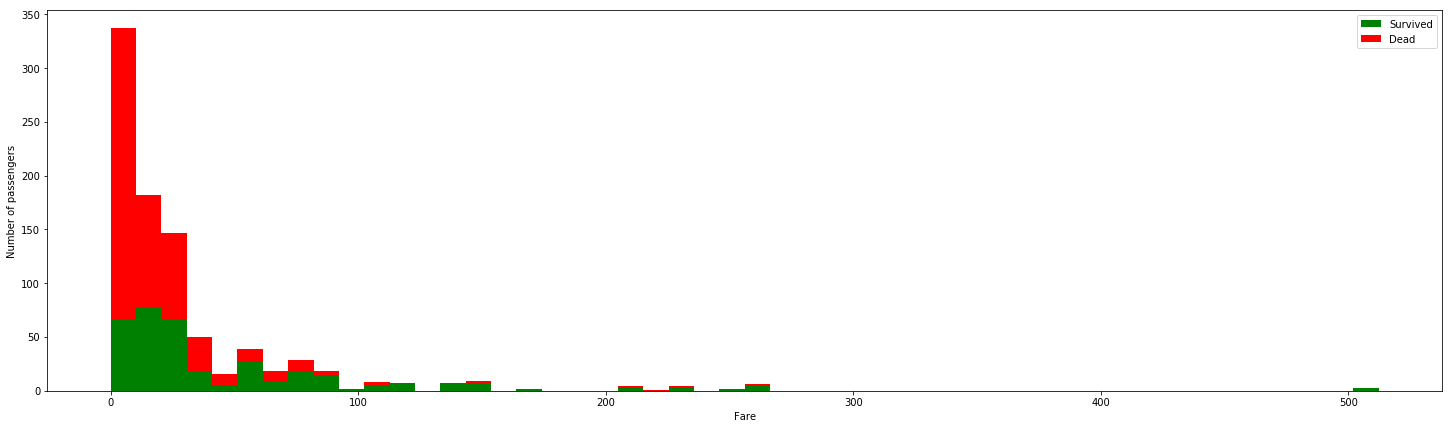

In [52]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], stacked=True, color = ['g','r'], bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

# plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], c='red', s=data[data['Survived'] == 0]['Fare']);

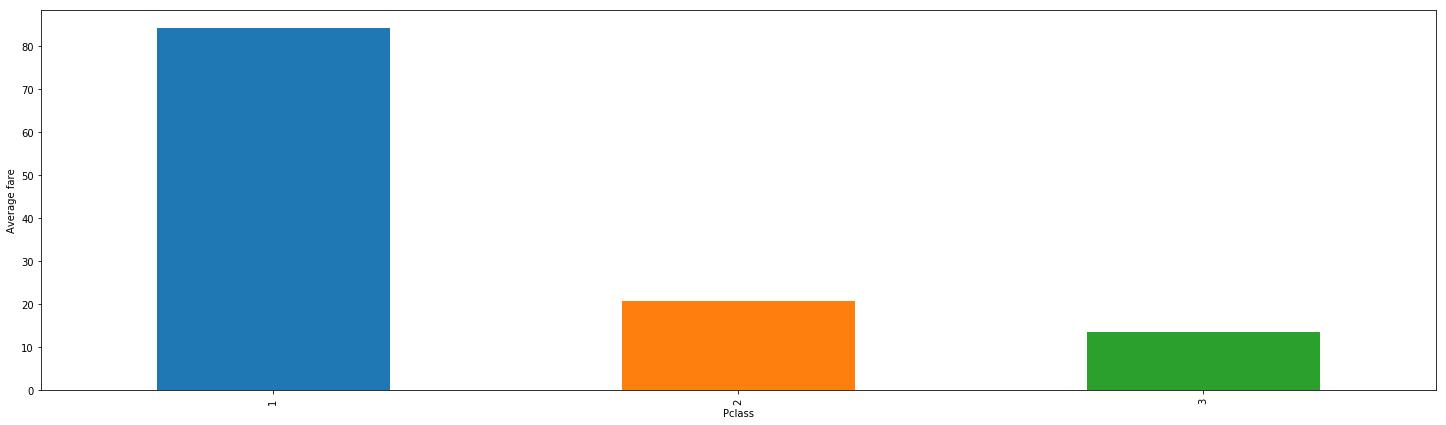

In [53]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

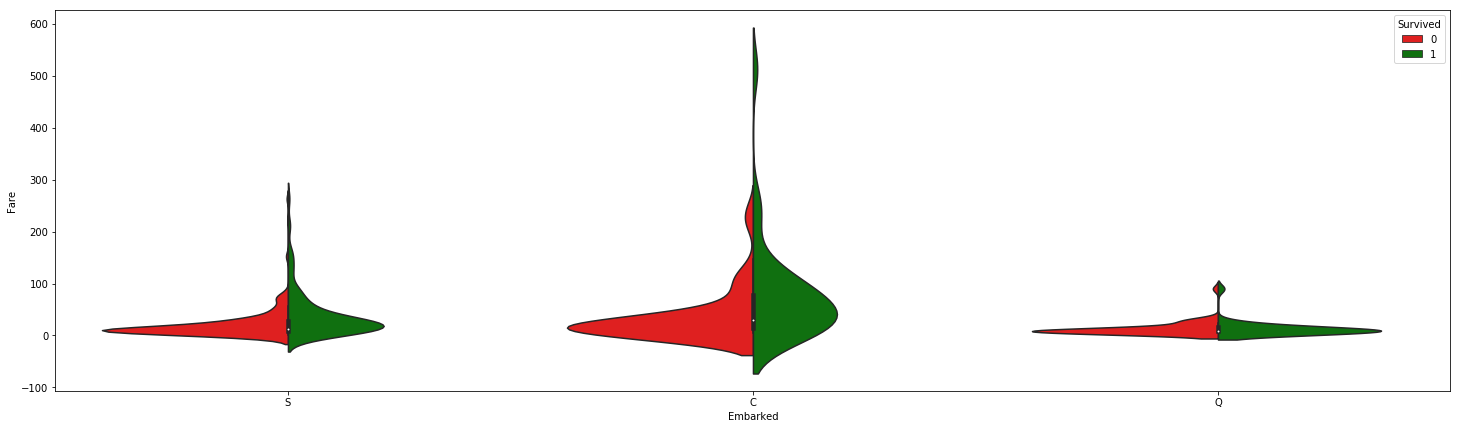

In [54]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

In [55]:
def status(feature):
    print('Processing', feature, ': ok')

In [56]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [57]:
combined = get_combined_data()

In [58]:
print(combined.shape)

(1309, 10)


In [59]:
print(combined.head())

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S  


In [60]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [61]:
print(titles)

{'Sir', 'Rev', 'Ms', 'Mr', 'Miss', 'Master', 'Major', 'Lady', 'the Countess', 'Dr', 'Don', 'Col', 'Capt', 'Mme', 'Mlle', 'Jonkheer', 'Mrs'}


In [62]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [63]:
combined = get_titles()

Processing Title : ok


In [64]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [65]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [66]:
print(combined.iloc[:891].Age.isnull().sum())

177


In [67]:
print(combined.iloc[891:].Age.isnull().sum())

86


In [68]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [69]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [70]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [71]:
combined = process_age()

Processing age : ok


In [72]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [73]:
combined = process_names()

Processing names : ok


In [74]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [75]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [76]:
combined = process_fares()

Processing fare : ok


In [77]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [78]:
combined = process_embarked()

Processing embarked : ok


In [79]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [80]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [81]:
print(train_cabin)

{'T', 'U', 'F', 'A', 'C', 'D', 'G', 'B', 'E'}


In [82]:
print(test_cabin)

{'U', 'F', 'A', 'C', 'D', 'G', 'B', 'E'}


In [83]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined



In [84]:
combined = process_cabin()

Processing cabin : ok


In [85]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [86]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [87]:
ombined = process_sex()

Processing Sex : ok


In [88]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [89]:
combined = process_pclass()

Processing Pclass : ok


In [90]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [91]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [92]:
print(len(tickets))

37


In [93]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [94]:
combined = process_ticket()

TypeError: object of type 'filter' has no len()

In [95]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [ ]:
combined = process_family()

In [ ]:
print(combined.shape)

In [ ]:
combined.head()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [ ]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [ ]:
train, test, targets = recover_train_test_target()

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [ ]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [ ]:
features.plot(kind='barh', figsize=(25, 25))

In [ ]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

In [ ]:
test_reduced = model.transform(test)
print(test_reduced.shape)

In [ ]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [ ]:
for model in models:
    print 'Cross-validation of : {0}'.format(model.__class__)
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print 'CV score = {0}'.format(score)
    print '****'

In [ ]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [ ]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./predictions/gridsearch_rf.csv', index=False)

In [ ]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

In [ ]:
predictions_df.to_csv('blending_base_models.csv', index=False)